## Production Inflation

"Production Price Inflation" also known as "PPI" measures the change in production costs.  The data analysis should provide some insight for the most significant periods of change in PPI and how this change has an overall impact on inflation as whole.

This analyis will answer two questions:

* Which years experienced the most significant increases/decreases in PPI?
* How does the U.S. individual inflation compare to the global changes?

In [113]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os


file_path = Path('Resources/global_dataset_of_inflation.csv')
data = pd.read_csv(file_path, encoding='utf-8', encoding_errors='ignore')

inflation_df = pd.DataFrame(data)

In [114]:
producer_inflation_data = inflation_df[inflation_df['Series Name'] == 'Producer Price Inflation']

producer_df = pd.DataFrame(producer_inflation_data)

drop_info = producer_df.iloc[:, 5:25]

copy_producer_df = producer_df.iloc[:, :5].join(producer_df.iloc[:, 25:59]).copy()

In [115]:
sum_stats_year = copy_producer_df.describe()
sum_stats_year_df = pd.DataFrame(sum_stats_year)

sum_stats_year_df

,IMF Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,113.00000,39.000000,42.000000,42.000000,49.000000,57.000000,58.000000,59.000000,62.000000,66.000000,...,97.000000,97.000000,97.000000,102.000000,104.000000,105.000000,102.000000,100.000000,100.000000,97.000000
mean,535.39823,199.566667,31.080952,33.358571,418.019592,211.513860,39.084655,18.529492,27.149677,6.683485,...,1.571546,2.181649,0.406495,3.881176,14.584038,1617.713810,3.256765,0.640600,12.873800,23.499588
std,302.89589,1078.975351,73.962802,127.763378,2076.774132,680.313387,95.917170,48.195594,124.524255,13.841697,...,5.771021,8.530138,16.795883,29.804446,88.509557,16511.787354,8.291322,11.259386,12.825199,20.414826
min,111.00000,-11.240000,-7.360000,-60.670000,-82.850000,-13.790000,-0.850000,-5.210000,-8.140000,-7.450000,...,-7.570000,-7.750000,-37.930000,-22.510000,-4.570000,-1.770000,-9.480000,-31.430000,-1.780000,1.530000
25%,228.00000,1.465000,0.820000,-0.115000,0.670000,1.370000,3.542500,0.975000,1.170000,-0.490000,...,-1.310000,-1.450000,-3.680000,-1.882500,1.960000,2.180000,0.195000,-2.680000,6.117500,11.250000
50%,534.00000,3.930000,2.865000,1.585000,3.960000,6.060000,7.545000,4.080000,3.740000,3.015000,...,0.380000,-0.120000,-0.950000,-0.450000,3.390000,3.950000,1.440000,-0.355000,9.540000,18.990000
75%,912.00000,11.525000,16.935000,12.220000,21.590000,30.070000,27.637500,16.635000,10.902500,8.767500,...,3.250000,2.910000,2.660000,2.900000,7.182500,6.180000,3.100000,2.985000,13.535000,26.570000
max,968.00000,6737.180000,306.290000,800.000000,14400.000000,3950.260000,498.310000,339.890000,971.200000,72.490000,...,37.270000,60.470000,142.030000,291.620000,905.660000,169201.780000,58.310000,56.140000,69.600000,130.850000


## Which years experienced the most significant increases/decreases in PPI?

The graph below displays the average ppi accross the globe for each year, with the most signfigant change happening in 2018  and 1993. 

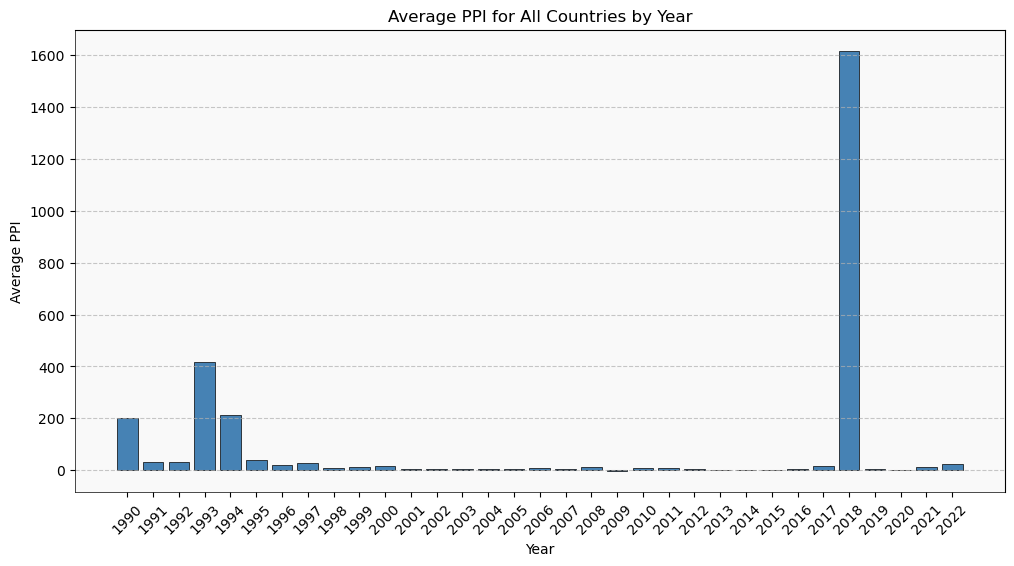

<Figure size 640x480 with 0 Axes>

In [116]:
# Extract the country names
countries = copy_producer_df['Country']

# Extract the year range (1990-2022)
year_range = producer_df.iloc[:, 25:58]

# Calculate the average PPI for all countries for each year
year_data = year_range.mean()

# Plot the average PPI for each year
plt.figure(figsize=(12, 6))
plt.bar(year_data.index, year_data.values, color='steelblue', edgecolor='black', linewidth=0.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average PPI')
plt.title('Average PPI for All Countries by Year')
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().spines['top'].set_visible(True)  # Hide the top border
plt.gca().spines['right'].set_visible(True)  # Hide the right border
plt.gca().spines['left'].set_linewidth(0.5)  # Thicker left border
plt.gca().spines['bottom'].set_linewidth(0.5)  # Thicker bottom border
plt.gca().set_facecolor('#f9f9f9') 

plt.show()
plt.savefig("../Images/gloable_average_bar.png")


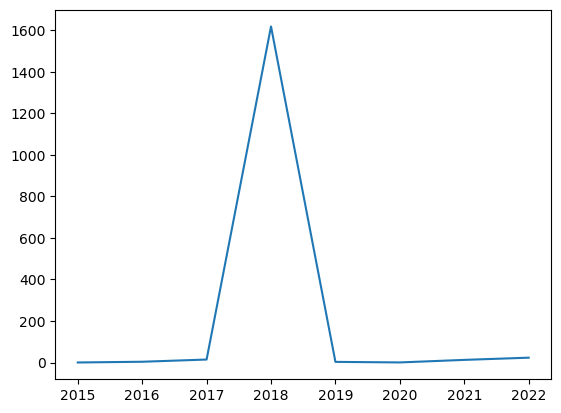

In [117]:
# Extract the country names
countries = copy_producer_df['Country']

# Extract the year range (1990-2022)
year_range2 = producer_df.iloc[:, 50:58]
year_data2 = year_range2.mean()


plt.plot(year_data2)

# Calculate the average PPI for all countries for each year
# year_data = year_range.mean()

In [118]:
usa_data = copy_producer_df[copy_producer_df['Country'] == 'United States']
usa_df = pd.DataFrame(usa_data)

columns_to_extract = usa_df.loc[:, '1990':'2022']
columns_to_extract

cleaned_usa_df = columns_to_extract.squeeze()

In [119]:
cleaned_usa_df;


## Which years experienced the most significant increases/decreases in PPI?

In the USA, 2008 marked an a high for the PPI, which an immediate low the following year. 

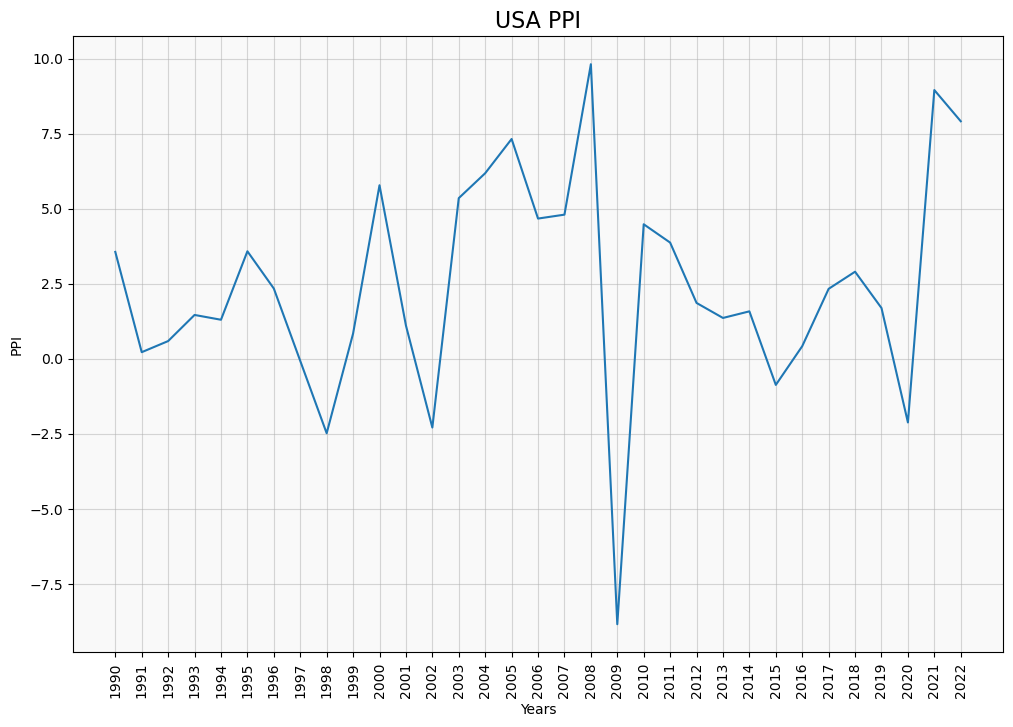

In [120]:
# Configure Plot Size
plt.figure(figsize=(12,8))

#Plot Data
plt.plot(cleaned_usa_df)
plt.title('USA PPI', fontsize=16)
plt.xlabel('Years')
plt.ylabel('PPI')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.5)

plt.gca().spines['top'].set_visible(True)  # Hide the top border
plt.gca().spines['right'].set_visible(True)  # Hide the right border
plt.gca().spines['left'].set_visible(True) # Thicker left border
plt.gca().spines['bottom'].set_visible(True)  # Thicker bottom border
plt.gca().set_facecolor('#f9f9f9') 
plt.show()

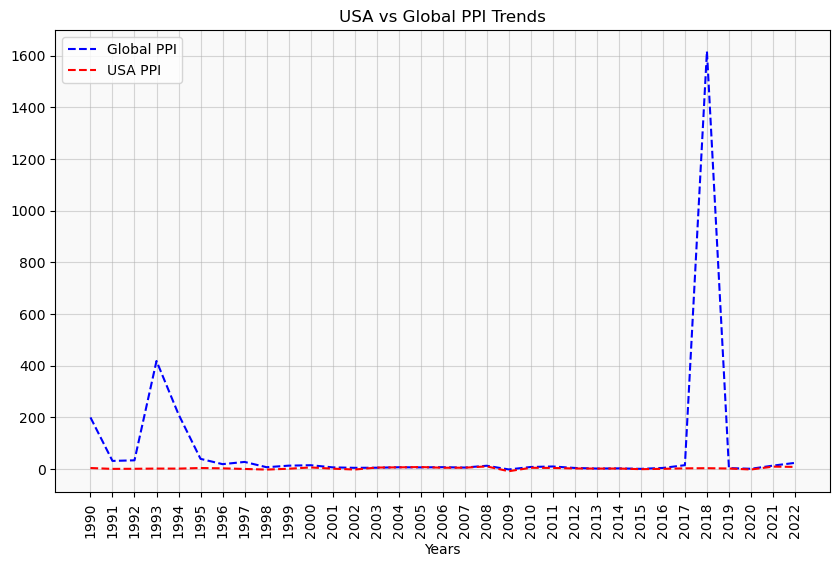

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(year_data, "b--", label="Global PPI")
plt.title('USA vs Global PPI Trends')
plt.xlabel('Years')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=90)
plt.plot(cleaned_usa_df, "r--", label="USA PPI")
plt.legend(loc="upper left")

plt.gca().spines['top'].set_visible(True)  # Hide the top border
plt.gca().spines['right'].set_visible(True)  # Hide the right border
plt.gca().spines['left'].set_visible(True) # Thicker left border
plt.gca().spines['bottom'].set_visible(True)  # Thicker bottom border
plt.gca().set_facecolor('#f9f9f9') 
plt.show()